# Analyse the ADS-B log.txt



In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Transfer data

Transfer data into prope forme  
@parametre: filename  
@return: transfered data

In [2]:
def transferData(filename):
    # get column name
    file = open(filename, 'r')
    line = file.readlines(1500)
    file.close()
    col = [x.strip(' ') for x in [i.split('|') for i in line[-2:-1]][0]]
    col = col[:-1]
    sub_data = pd.read_csv(filename, sep= '|',
                       names=col, 
                       skiprows=11, 
                       index_col=False, 
                       skipinitialspace=True,  
                       na_values=['NULL','NULL     ','spi   ','alert ','onground '], 
                       false_values=['false    ','false ','false ','false    '],
                       true_values=['true  ','true     ','true  '],
                       iterator=True,
                       chunksize=1000
                      )
    data=pd.concat(sub_data)
    data = data.iloc[:-6,1:]
    for name in ['lat', 'lon','velocity','heading','vertrate','baroaltitude','geoaltitude','lastposupdate','lastcontact']:
        data[name] = pd.to_numeric(data[name], errors='coerce')
    return data

## Create itinerary picture  
@parametre: data  
save as **itinerary.jpg**

In [8]:
def itinerary(data):
    fig = plt.figure()
    ax = Axes3D(fig)
    data = data.dropna(how='any')
    ax.plot(data.lat, data.lon, data.geoaltitude, c='r')
    ax.bar3d(data.lat, data.lon, data.geoaltitude, 0.01, 0.01,data.vertrate*110, shade=False, label='vertrate')
    ax.set_xlabel('latitude')
    ax.set_ylabel('longitude')
    ax.set_zlabel('altitude')
    plt.savefig('itinerary.jpg')
    plt.show()

In [3]:
data=transferData('../../Thales/log.txt')
data.shape

(1417378, 17)

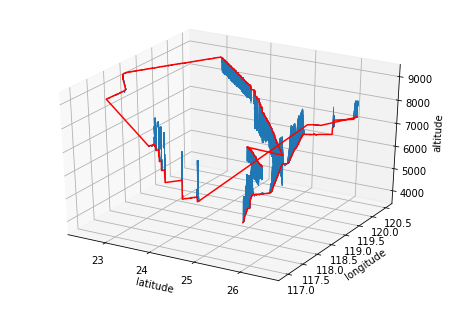

In [11]:
itinerary(data[:5500])

In [8]:
coor = data.loc[:,['lat','lon','geoaltitude']]
coor.shape

(1417378, 3)

In [10]:
coor=coor.dropna(how='any')
coor.shape

(1181923, 3)

In [11]:
coor.head

<bound method NDFrame.head of                lat         lon  geoaltitude
3        24.829697  118.528951      3482.34
4        24.831336  118.531235      3497.58
5        24.831336  118.531235      3497.58
6        24.832947  118.533529      3512.82
7        24.834595  118.535847      3520.44
8        24.835785  118.537496      3520.44
9        24.835785  118.537496      3535.68
10       24.835785  118.537496      3535.68
11       24.839081  118.542124      3535.68
12       24.839081  118.542124      3535.68
13       24.839081  118.542124      3535.68
14       24.842509  118.546937      3558.54
15       24.842509  118.546937      3558.54
16       24.842509  118.546937      3558.54
17       24.842509  118.546937      3558.54
18       24.842509  118.546937      3558.54
19       24.842509  118.546937      3558.54
20       24.842509  118.546937      3558.54
21       24.842509  118.546937      3558.54
22       24.842509  118.546937      3558.54
23       24.842509  118.546937      3558.54
24

In [12]:
coor.to_csv('coor.csv')